In [2]:

import numpy as np
import sys
import yaml
from matplotlib import pyplot as plt
import SimpleITK as sitk
import pickle as pkl





sys.path.append("../")

sys.path.append("../../")

from scripts.Registration3D.registration import central_normalize_img, calculate_ct2us_transform


from UltrasoundNavigation.img_utils import flip_img


%load_ext autoreload
%autoreload 2

# 3D Registration between US and CT

In [ ]:
def precision(hp,hg):
    '''
        hp: binary array. The predicted segmentation.
        hg: binary array. The ground truth segmentation.

        Output: the precision value given prediction hp against ground truth hg
    '''
    return np.sum(np.logical_and(hp,hg))/np.sum(hp)

def recall(hp,hg):
    '''
        hp: binary array. The predicted segmentation.
        hg: binary array. The ground truth segmentation.

        Output: the recall value given prediction hp against ground truth hg
    '''
    return np.sum(np.logical_and(hp,hg))/np.sum(hg)

def dice(hp,hg):
    '''
        hp: binary array. The predicted segmentation.
        hg: binary array. The ground truth segmentation.

        Output: the dice value given prediction hp against ground truth hg
    '''
    return 2*np.sum(np.logical_and(hp,hg))/(np.sum(hg)+np.sum(hp))



In [41]:


original_vessel_ct = sitk.ReadImage('./data/vessel_ct.nii.gz')
# The left-right order is different between the US image and CT image. We flip vessel_ct to make them consistent.
original_vessel_ct = flip_img(original_vessel_ct,[True,False,False])
vessel_ct = central_normalize_img(original_vessel_ct,150)

pre_stats = []
post_stats = []
for us_idx in range(10):
    original_vessel_us = sitk.ReadImage('./data/prediction_{}.seg.nrrd'.format(us_idx))
    vessel_us = central_normalize_img(original_vessel_us,150)

    CT2US, Hp, Hg, Hreg = calculate_ct2us_transform(vessel_us,vessel_ct)
    hp = sitk.GetArrayFromImage(Hp)>0.5
    hg = sitk.GetArrayFromImage(Hg)>0.5
    hr = sitk.GetArrayFromImage(Hreg)>0.5

    pre_stats.append((precision(hp,hg), recall(hp,hg), dice(hp,hg)))
    post_stats.append((precision(hr,hg), recall(hr,hg), dice(hr,hg)))
    

Start optimizing the transformation


100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:15<00:00,  1.54s/it]


Start optimizing the transformation


100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


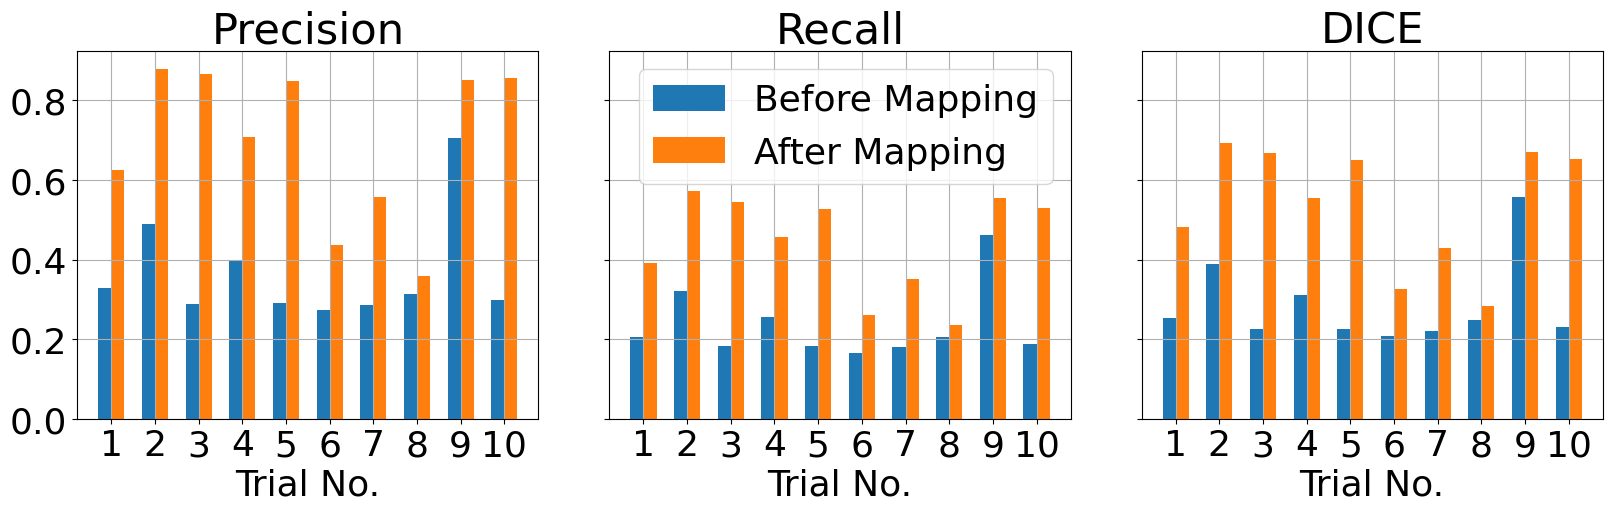

In [115]:
pre_stats

metric_name = ['Precision','Recall','DICE']

rc('font',size=26)
fig,axes = plt.subplots(1,3,figsize=(16,5),sharey=True)
legend_plot = 1
for i in range(3):
    ax = axes[i]
    pre_precision = [p[i] for p in pre_stats]

    post_precision = [p[i] for p in post_stats]

    width = 0.3

    ax.bar(np.arange(1,11)-width/2, pre_precision,width,label='Before Mapping' if i==legend_plot else None)

    ax.bar(np.arange(1,11)+width/2, post_precision,width,label='After Mapping' if i==legend_plot else None)
    ax.set_xticks(np.arange(1,11))
    ax.grid('on')
    if i==legend_plot:
        ax.legend()
    ax.set_title(metric_name[i])
    ax.set_xlabel('Trial No.')
plt.tight_layout(pad=0.1)
plt.savefig('./figures/registration_metric.png')
plt.show()

In [43]:
post_stats

[(0.6241928149158709, 0.39074242769300843, 0.48061906929514336),
 (0.8795159593125219, 0.5710544295149169, 0.6924882629107981),
 (0.8655028943560058, 0.5448075609200638, 0.6686932215234102),
 (0.7086914149020997, 0.4554201776360738, 0.5545041766316592),
 (0.8481349097241316, 0.5268731496242314, 0.6499736611062336),
 (0.43539219401288365, 0.26167160100204967, 0.32688477951635847),
 (0.5566123188405797, 0.3498633568663175, 0.4296601873863795),
 (0.3576394924387276, 0.23428603962650876, 0.283109735122119),
 (0.8503318197694726, 0.5544295149168754, 0.6712158808933002),
 (0.8551031687546058, 0.5285242541562286, 0.6532723434201266)]

In [10]:
print(CT2US)

itk::simple::CompositeTransform
 CompositeTransform (0x13a2198d0)
   RTTI typeinfo:   itk::CompositeTransform<double, 3u>
   Reference Count: 1
   Modified Time: 13532966
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   TranslationTransform (0x13a20e3f0)
     RTTI typeinfo:   itk::TranslationTransform<double, 3u>
     Reference Count: 1
     Modified Time: 3865
     Debug: Off
     Object Name: 
     Observers: 
       none
     Offset: [-159.362, -56.8273, -71.171]
   >>>>>>>>>
   CompositeTransform (0x14af07290)
     RTTI typeinfo:   itk::CompositeTransform<double, 3u>
     Reference Count: 1
     Modified Time: 13532962
     Debug: Off
     Object Name: 
     Observers: 
       none
     Transforms in queue, from begin to end:
     >>>>>>>>>
     Euler3DTransform (0x14af0e880)
       RTTI typeinfo:   itk::Euler3DTransform<double>
       Reference Count: 1
       Modified Time: 13532960
       Debug: Off
       Object 

In [39]:
with open('./data/CT2US.pkl','wb') as fp:
    pkl.dump(CT2US,fp)

In [40]:
with open('./data/CT2US.pkl','rb') as fp:
    CT2US = pkl.load(fp)